# Ecuación de Beattie-Bridgeman

1. Concepto

A traves de los años se han propuesto diversas ecuaciones para explicar los datos $pVT$ observados para gases, siendo la ecuación de van der Waals una de ellas. Sin embargo, la ecuación de Beattie-Bridgeman es de las más apropiadas para trabajos de precisión. Esta ecuación comprende cinco constantes además de $R$: $A_o$, $a$, $B_o$, $b$ y $c$. Estos valores son obtenidos experimentalmente y pueden ser consultados para algunos gases. La ecuación en su forma virial es:

$p = \frac{RT}{V} + \frac{\beta}{V^2} + \frac{\gamma}{V^3} + \frac{\delta}{V^4}$ (1)

Los términos 2, 3 y 4 en el lado derecho de la ecuación (1) puede visualizarse como correcciones a la Ley de los Gases Ideales,

$p = \frac{RT}{V}$ (2)

atribuibles al comportamiento no-ideal.
Los parametros $\beta$, $\gamma$ y $\delta$ se definen como:

$\beta = RTb_0 - a_0 - \frac{Rc}{T^2}$ (3)

$\gamma = - RTb_0b + a_0a - \frac{Rcb_0}{T^2}$ (4)

$\delta = \frac{Rb_0bc}{T^2}$ (5)

La ecuación (1) es explícita en la presión p, pero implícita en la temperatura T y el volumen V. Por consiguiente, se requiere de un método iterativo para encontrar el volumen que corresponde a valores dados de presión y temperatura.

2. Propuesta

Después de calcular V, se puede obtener el factor de compresibilidad z, donde:

$z = \frac{pV}{RT}$ (6)

El factor de compresibilidad es un índice útil del comportamiento de un gas ideal, siendo $z=1$ para un gas ideal. Para este proyecto, se calculará el factor de compresibilidad del metano.

3. Implementación

Se puede reescribir la ecuación (1) en la forma:

$f(V) = \frac{RT}{V} + \frac{\beta}{V^2} + \frac{\gamma}{V^3} + \frac{\delta}{V^4} - p = 0$

Se utilizarán unidades de atmósferas para p, litros/g mol para V y °K para T, la constante de los gases $R = 0.08205$ litros atm / °K g mol. Para este conjunto de unidades, las constantes apropiadas para el metano son:

In [52]:
a0 = 2.2769
b0 = 0.05587
a = 0.01855
b = -0.01587
c = 128300

El método que se va a emplear es el de Newton-Raphson, por lo que se necesitará una primera aproximación. Esta será dada por la propia Ley de los Gases Ideales:

$V_1 = \frac{RT}{p}$

Se obtendrán los valores para una temperatura de 200°C (473.15°K) y para una presión (en atmósferas) de 10.

In [53]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import math as math

In [54]:
def beta(R,T,a0,b0,c):
    bet = R*T*b0 - a0 - ((R*c)/(T**2))
    return bet

In [55]:
def gamma(R,T,a0,b0,a,b,c):
    gam = -R*T*b0*b + a0*a - ((R*c*b0)/(T**2))
    return gam

In [56]:
def delta(R,T,b0,b,c):
    delt = (R*b0*b*c)/(T**2)
    return delt

In [57]:
def vol(V):
    f = (R*T)/V + beta(R,T,a0,b0,c)/(V**2) + gamma(R,T,a0,b0,a,b,c)/(V**3) + delta(R,T,b0,b,c)/(V**4) - p
    return f

In [58]:
def dvol(V):
    df = -(R*T)/(V**2) - (2*beta(R,T,a0,b0,c))/(V**3) - (3*gamma(R,T,a0,b0,a,b,c))/(V**4) - (4*delta(R,T,b0,b,c))/(V**5)
    return df

In [59]:
R = 0.08205
T = 473.15
p = 10

In [60]:
def gn(V):
    return V - (vol(V)/dvol(V))

4. Resultados

Obteniendo el volumen:

In [61]:
V=R*T/p
print(V)
while V!=gn(V):
    V=gn(V)
    print(V)

3.8821957499999997
3.8786899634619267
3.878693124423494
3.87869312442607
3.878693124426069


Obteniendo el error en cada iteración:

In [62]:
V=R*T/p
while V!=gn(V):
    err=math.fabs(gn(V)-V)
    print(err)
    V=gn(V)

0.003505786538072986
3.16096156716128e-06
2.5761615063402132e-12
8.881784197001252e-16


Calculando el factor de compresibilidad:

In [63]:
z = (p*V)/(R*T)
print(z)

0.9990977720343106


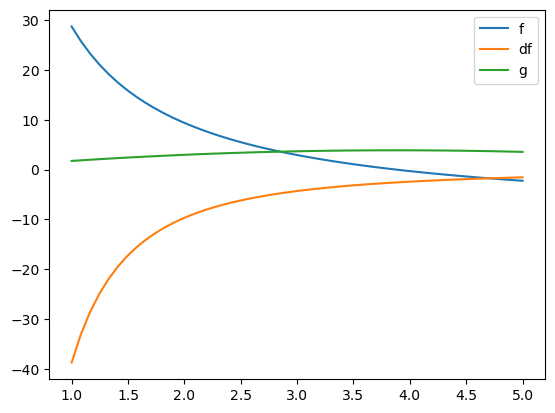

In [69]:
x=np.linspace(1,5)
f=[vol(b) for b in x]
df=[dvol(b) for b in x]
g=[gn(b) for b in x]
plt.plot(x,f)
plt.plot(x,df)
plt.plot(x,g)
plt.legend(['f','df','g'])
plt.show()

5. Conclusiones / Análisis

Los errores de esta prueba son pequeños, por lo que en cada iteración el valor obtenido se aproxima cada vez mas al valor real. El factor de compresibilidad del metano esta cerca de 1, sin embargo, esto lo hace un gas no ideal. Como este factor tambien depende de la presión y la temperatura, es posible hacer una tabla con ciertos valores comunes en la industria.